In [16]:
import geopandas as gpd
import glob
import rasterio
import matplotlib.pyplot as plt
import numpy as np

In [17]:
for file in glob.glob("E:/output/Coepelduynen_segmentations/*v1_3.shp"):
    print(file)

E:/output/Coepelduynen_segmentations\20190302_105726_SV1-01_50cm_RD_11bit_RGBI_Warmond_natura2000_coepelduynen_cropped_ndvi_height_randomforest_classifier_v1_3.shp
E:/output/Coepelduynen_segmentations\20190302_105829_SV1-01_50cm_RD_11bit_RGBI_KatwijkAanZee_natura2000_coepelduynen_cropped_ndvi_height_randomforest_classifier_v1_3.shp
E:/output/Coepelduynen_segmentations\20190308_111644_SV1-01_50cm_RD_11bit_RGBI_Oegstgeest_natura2000_coepelduynen_cropped_ndvi_height_randomforest_classifier_v1_3.shp
E:/output/Coepelduynen_segmentations\20190422_111335_SV1-01_50cm_RD_11bit_RGBI_Oegstgeest_natura2000_coepelduynen_cropped_ndvi_height_randomforest_classifier_v1_3.shp
E:/output/Coepelduynen_segmentations\20190601_105844_SV1-04_50cm_RD_11bit_RGBI_KatwijkAanZee_natura2000_coepelduynen_cropped_ndvi_height_randomforest_classifier_v1_3.shp
E:/output/Coepelduynen_segmentations\20191130_110721_SV1-01_50cm_RD_11bit_RGBI_Rijnsburg_natura2000_coepelduynen_cropped_ndvi_height_randomforest_classifier_v1_3.

In [18]:
file = "E:/output/Coepelduynen_segmentations/20190302_105726_SV1-01_50cm_RD_11bit_RGBI_Warmond_natura2000_coepelduynen_cropped_ndvi_height_randomforest_classifier_v1_3.shp"
file = file.replace("\\","/")


In [28]:
adf  = gpd.read_file(file)
adf = adf.set_crs("EPSG:28992")

In [32]:
adf

,label,geometry
0,Vegetation,"MULTIPOLYGON (((87596.750 469706.250, 87596.75..."
1,Vegetation,"MULTIPOLYGON (((87651.250 469614.750, 87651.25..."
2,Vegetation,"MULTIPOLYGON (((87574.750 469723.750, 87574.75..."
3,Schaduw,"MULTIPOLYGON (((87645.250 469680.750, 87644.75..."
4,Vegetation,"MULTIPOLYGON (((87592.750 469711.750, 87592.75..."
5,Water,"MULTIPOLYGON (((87979.250 469407.250, 87979.25..."
6,Zand,"MULTIPOLYGON (((87633.250 469637.750, 87632.75..."


In [33]:
adf = adf.replace('Asfalt','Vegetation')
adf = adf.replace('Bos','Vegetation')
adf = adf.replace('Gras','Vegetation')
adf = adf.replace('Struweel','Vegetation')
adf = adf.replace('Vochtige duinvallei','Water')

In [34]:
adf

,label,geometry
0,Vegetation,"MULTIPOLYGON (((87596.750 469706.250, 87596.75..."
1,Vegetation,"MULTIPOLYGON (((87651.250 469614.750, 87651.25..."
2,Vegetation,"MULTIPOLYGON (((87574.750 469723.750, 87574.75..."
3,Schaduw,"MULTIPOLYGON (((87645.250 469680.750, 87644.75..."
4,Vegetation,"MULTIPOLYGON (((87592.750 469711.750, 87592.75..."
5,Water,"MULTIPOLYGON (((87979.250 469407.250, 87979.25..."
6,Zand,"MULTIPOLYGON (((87633.250 469637.750, 87632.75..."


In [35]:
coepelduynen_no_ashpalt = gpd.read_file("C:/Users/pzhadmin/Documents/natura2000_coepelduynen_no_asphalt.geojson")

In [36]:
adf = adf.dissolve(by='label', as_index=False)

In [37]:
adf

,label,geometry
0,Schaduw,"MULTIPOLYGON (((87647.750 469680.750, 87647.25..."
1,Vegetation,"MULTIPOLYGON (((87561.250 469731.750, 87561.25..."
2,Water,"MULTIPOLYGON (((87978.250 469406.750, 87978.25..."
3,Zand,"MULTIPOLYGON (((87632.250 469637.750, 87632.25..."


In [24]:
adf  = gpd.overlay(adf, coepelduynen_no_ashpalt  , how='intersection')

<AxesSubplot:>

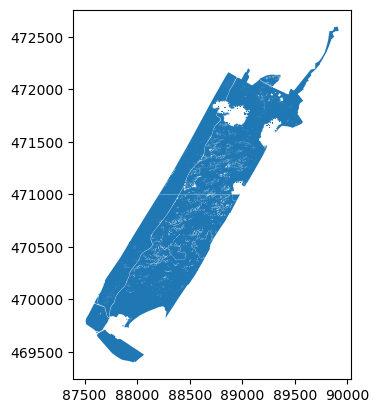

In [25]:
adf.plot()

In [26]:
adf

,geometry
0,"MULTIPOLYGON (((88707.250 470841.250, 88707.75..."
1,"MULTIPOLYGON (((88208.750 471000.750, 88208.75..."
2,"MULTIPOLYGON (((88541.750 470236.250, 88542.25..."
3,"MULTIPOLYGON (((88903.750 470995.750, 88904.25..."


In [38]:
for file in glob.glob("E:/output/Coepelduynen_segmentations/*v1_3.shp"):
    file = file.replace("\\","/")
    adf = gpd.read_file(file)
    adf = adf.set_crs("EPSG:28992") 

    adf = adf.replace('Asfalt','Vegetation')
    adf = adf.replace('Bos','Vegetation')
    adf = adf.replace('Gras','Vegetation')
    adf = adf.replace('Struweel','Vegetation')
    adf = adf.replace('Vochtige duinvallei','Water')

    adf = adf.dissolve(by='label', as_index=False)
    adf  = gpd.overlay(adf, coepelduynen_no_ashpalt  , how='intersection')
    adf.to_file("E:/output/Coepelduynen_segmentations_production/"+file.split("/")[-1].replace(".shp","_vegetation_sand.shp"))

In [15]:
adf

,geometry
0,"MULTIPOLYGON (((89908.250 472595.250, 89908.25..."
1,"MULTIPOLYGON (((88446.750 471021.750, 88446.75..."
2,"MULTIPOLYGON (((89888.750 472552.250, 89888.75..."
3,"MULTIPOLYGON (((89916.750 472556.750, 89916.75..."
